In [1]:
# Imports:

from matplotlib import pyplot as plt
import numpy as np
import os
from scipy import signal
import matplotlib.animation as animation

In [20]:
# Define kernel for smoothing measurements by convolution:

#kernel = np.array([0.1,0.2,0.3,0.4,0.3,0.2,0.1])
gauss = signal.gaussian(80, std=7)
kernel = gauss/np.sum(gauss)

In [21]:
n_files = 150
datas = []
for i in range(n_files):
    x, Amplitude = np.loadtxt("input/testProfil" + str(i+1) + ".txt", unpack = True)
    Amplitude = np.convolve(Amplitude, kernel)
    datas.append([x,Amplitude[:-len(kernel)+1]])


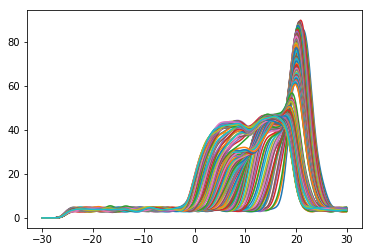

In [22]:
# Plot all data:

for data in datas:
    x = data[0]
    Amplitude = data[1]
    plt.plot(x, Amplitude)

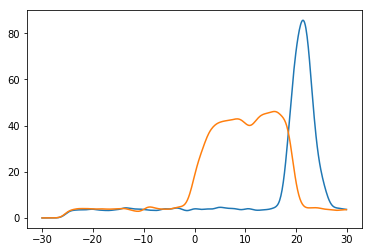

In [23]:
# Plot first and last:

for data in datas[::n_files-1]:
    x = data[0]
    Amplitude = data[1]
    plt.plot(x, Amplitude)

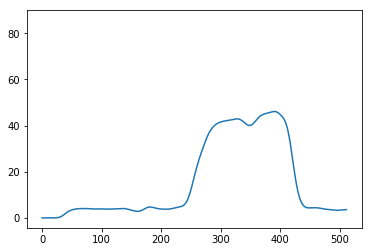

In [24]:
# Plot the results:

plt.rcParams["animation.html"] = "jshtml" # Fix for not displaying animation, see: https://stackoverflow.com/questions/35532498/animation-in-ipython-notebook/46878531#46878531

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = datas[0][0]
line, = ax.plot(datas[0][1])

#print(datas[20][1])


def animate(i):
    line.set_ydata(datas[i][1])  # update the data.
    return line,

ani = animation.FuncAnimation(fig, animate, interval=50, blit=True, save_count=n_files) # See: https://matplotlib.org/stable/gallery/animation/simple_anim.html

ani